# <center>Analysis of Crime Incident Reports - Boston</center>

<center>Darshan Mehta</center>

## Introduction

Crime has become so common these days that people are starting to see it as a part of society. There are an endless number of movies and shows which are centered around crime. The entire collection of movies and TV shows under DC comics depict crime to be deeply rooted in the civilization. It has become so commonplace that some even go as far to claim it to be "an integral part of a healthy society" [[1]](#References). According to Durkheim [[1]](#References), the amount of deviance in crime remains relatively stable over time. I find that statement a little suspectful. Just considering mass shootings in the United States, the crime rate went up by 24% since the last year. The average mass shooting in 2018 was 0.88 per day [[2]](#References) and bumped up to 1.24 per day in 2019 [[3]](#References). While this doesn't negate Durkheim's hypothesis, but it is contradicting enough to spark some curiosity.

For this analysis, a major reason behind picking Boston for the analysis was that I was looking to move to the East Coast for work after graduating. And as part of my basic search, understanding the crime statistics of the cities was an important factor. A potential **stakeholder** for this project could be anyone who is living in or is visiting Boston.

## Related Work


There have been some analysis done in the past such as that in [[5]](#References), [[6]](#References), and [[7]](#References) which bring to light some interesting facts such as Friday being the most common day for crimes and 5 PM a popular time for motor accidents [[5]](#References). A common issue, however, in these studies was there was little to no documentation on the process. No description of when and how the data was collected and processed, what the plots implied etc. And judging by the dates present in the page, they seem to be fairly old. The questions asked by [[6]](#References) are, however, very interesting and would form the basis of a lot of my questions. The page, however, lacks documentation completely. Even the name of the dataset or the link to it is missing, which makes it very skeptical.

## Research Questions

The focus of this analysis is to understand the distribution of the different kinds of crimes across disticts and time. This should hopefully give us a pretty good sense of which areas are safe and which are not. The questions that I wish to answer in this analysis are as follows:

1. What is the overall distribution of the different kinds of crimes in Boston?
2. How do different districts in Boston compare on the basis of overall crime incident reports?
3. What are the top 10 crimes in each of the districts?
4. What are the top 10 crimes at different times of the day?
5. During what times of the day are shooting incidents most prevelant?
6. What reported incidents are most commonly associated with a shooting?
7. Which districts suffer more shooting incidents than the others?

## Dataset

For this project, I plan to explore the Crime Incident Reports dataset [[4]](#References) that is published by the Boston Police Department on all the crimes which were reported between June 2015 and November 2019. It is a very rich city-level dataset which provides detailed categorization of the crimes along with the time and location of the incident. The dataset can either be collected using the API provided by the Boston Police Department or by directly downloading the CSV file present on their website [[4]](#References). For this analysis, we go with the latter. The dataset is release under the Open Data Commons Public Domain Dedication and License ([PDDL](https://opendatacommons.org/licenses/pddl/index.html)) [[4, 8]](#References).

The dataset consists of three files which can be downloaded from [[4]](#References):

- **raw_data.csv**
This dataset is located at [data/raw_data.csv](data/raw_data.csv). It is the most important file in this analysis which contains details on what crime happened when and where. A detail description of the columns is present in the table below. Note, this description is partially present in one of the files [data/rmscrimeincidentfieldexplanation.xlsx](data/rmscrimeincidentfieldexplanation.xlsx) provided by the BPD. This file is ~78.6 MB in size.

| Column | Description |
|--------|-------------|
| INCIDENT_NUMBER | Internal BPD report number |
| OFFENSE_CODE | Numerical code of offense description |
| OFFENSE_CODE_GROUP | Internal categorization of OFFENSE_DESCRIPTION |
| OFFENSE_DESCRIPTION | Primary descriptor of incident |
| DISTRICT | What district the crime was reported in |
| REPORTING_AREA | RA number associated with the where the crime was reported from. |
| SHOOTING | Indicated a shooting took place. |
| OCCURRED_ON_DATE | Earliest date and time the incident could have taken place |
| YEAR | Year component of OCCURRED_ON_DATE |
| MONTH | Month component of OCCURRED_ON_DATE |
| DAY_OF_WEEK | Day of Week component of OCCURRED_ON_DATE |
| HOUR | Hour component of OCCURRED_ON_DATE |
| UCR_PART | Universal Crime Reporting Part number (1, 2, 3) |
| STREET | Street name the incident took place |
| Lat | Latitude where the incident took place |
| Long | Longitude where the incident took place |
| Location | Latitude and Longitude where the incident took place |

- **rmscrimeincidentfieldexplanation.xlsx**
This dataset is located at [data/rmscrimeincidentfieldexplanation.xlsx](data/rmscrimeincidentfieldexplanation.xlsx). It contains decriptions of some of the main columns in [data/raw_data.csv](data/raw_data.csv). Note that this file misses the description of some columns which self explanatory. Description of the columns is present in the table below:

| Column | Description |
|--------|-------------|
| Field Name, Data Type Required | Name of the column in raw_data.csv along with its datatype and the NULL value constraint |
| Description | Description of the column |

- **rmsoffensecodes.xlsx**
This dataset is located at [data/rmsoffensecodes.xlsx](data/rmsoffensecodes.xlsx). It contains a list of all the offense codes along with a description of what they stand for. Description of the columns is present in the table below:

| Column | Description |
|--------|-------------|
| CODE | Offense code value |
| NAME | Name of the offense corresponding to the CODE |


## Ethical Considerations

The dataset provides only the street information and doesn't narrow it down any further to the building number, etc. Hence, I feel that there are no ethical considerations with this dataset. This information should be released publicly so that people can be aware of what is happening in their neighbourhood and city. One shouldn't have to file a Freedom of Information Act (FOIA) request again and again to keep themselves posted of their surroundings. It is credit to this information that the public can find out and take action when they feel that the crime is rising and the law isn't doing enough.

## Human-Centered Considerations

This project could be very useful for someone who plans move to the Boston city or is already staying there. It contains the most recent data possible (see [Limitations](#Limitations)). It could help someone understand the crime statistics of the city such as the main places and times where these crimes happen, etc. and help make better decisions about where to stay and which places to avoid in order to stay safe. Survival instinct is one of the most basic instincts to all kinds of life and hopefully this work could help someone improve their chances of getting hurt.

It could be the case that this analysis might result in showing that certain parts of the city are more common for certain crimes. And many-a-times, the areas could be tied down to a certain community but that is not the intent of the study and hence the mapping is not a part of this study or the dataset. The intent here is just to provide information for people to make smarter choices in order to stay safe and I do not wish for any service provider to alter their services based on this information. Moreover, this information is public and provided by the government and could anyway be misused if so were the intentions of people. This project does not aim to aid misuse of any form.

## Methodology

The questions asked in this analysis mainly focus on understanding the distribution of crime incidents across space and time in Boston. To get from raw data to insights, we will explore the data to find the issues in it and clean them accordingly. We aim to use the data as is for most parts, and not impute any null values except for in the case of the `SHOOTING` column where, as you will find below, there is a data entry issue. One interesting cleaning we do is to uninflate the entries made in this dataset. The key to understanding this step is explained in the section where we discover the problem. Find more detailed code walkthrough in the [Data Exploration and Cleaning](#Data-Exploration-and-Cleaning) section below.

Post cleaning, we begin to answer the questions by constructing graphs and tables whenever necessary. We aim to keep the steps very simple so that it could be easily understood (and consequently accepted) by a wide group of people. For most of the questions, we construct histogram plots of the frequency of values in certain columns. We limit the number of items that we display on the plot when the question asked if of the form "What are the top 10...". The design for these plots are chosen to be very simple and easy to understand. We choose not to combine multiple histograms into one mainly because in some of the questions where such a step can be performed, combining the histograms from all the plots into one would shoot up the number of bars in the image making it hard for the user to interpret. More details on why and how each step is performed and the resulting observations can be found in the [Findings](#Findings) section below.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell

%matplotlib inline
np.set_printoptions(suppress=True)
InteractiveShell.ast_node_interactivity = "all"

## Data Exploration and Cleaning

First we read the raw data file and the offense codes file from the `data/` folder. We then print the number of rows in each of the files. We also display a few top rows from the file to understand what the data looks like. 

In [2]:
raw_data = pd.read_csv('data/raw_data.csv')
offense_codes = pd.read_excel('data/rmsoffensecodes.xlsx')

print("Number of rows in raw_data file:", len(raw_data))
print("Number of rows in offense_codes file:", len(offense_codes))

Number of rows in raw_data file: 438757
Number of rows in offense_codes file: 576


In [3]:
raw_data.head() # Display the top 5 rows of raw data

offense_codes.head() # Display the top 5 rows of offense codes

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,TESTTEST2,423,NaN,ASSAULT - AGGRAVATED,External,,0,2019-10-16 00:00:00,2019,10,Wednesday,0,NaN,RIVERVIEW DR,NaN,NaN,"(0.00000000, 0.00000000)"
1,I92089785,3005,NaN,SICK ASSIST,E13,574,0,2019-11-05 18:00:00,2019,11,Tuesday,18,NaN,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
2,I90583827,1402,NaN,VANDALISM,E18,498,0,2019-11-02 05:09:00,2019,11,Saturday,5,NaN,BRADLEE ST,NaN,NaN,"(0.00000000, 0.00000000)"
3,I192082859,724,Auto Theft,AUTO THEFT,E18,519,NaN,2019-10-13 09:28:24,2019,10,Sunday,9,Part One,LINCOLN ST,42.259518,-71.121563,"(42.25951765, -71.12156299)"
4,I192082751,724,Auto Theft,AUTO THEFT,E18,493,NaN,2019-10-12 20:11:26,2019,10,Saturday,20,Part One,METROPOLITAN AVE,42.262092,-71.116710,"(42.26209214, -71.11670964)"


,CODE,NAME
0,612,LARCENY PURSE SNATCH - NO FORCE
1,613,LARCENY SHOPLIFTING
2,615,LARCENY THEFT OF MV PARTS & ACCESSORIES
3,1731,INCEST
4,3111,LICENSE PREMISE VIOLATION


From the tables, we see that there are some redundant columns, for ex., `Location` is just a combination of `Lat` and `Long` and `OCCURED_ON_DATE` has been further broken down into `YEAR`, `MONTH`, etc. Let us drop the `Location` column for now and keep the other redundant columns. We will remove them later if we don't need them at all. We shall also convert the data type of OCCURED_ON_DATE to a datetime format for easy plotting.

In [4]:
raw_data = raw_data.drop(columns=['Location'])
raw_data['OCCURRED_ON_DATE'] = pd.to_datetime(raw_data['OCCURRED_ON_DATE'])

Now, let us verify if the number of Offense codes present in the offense codes dataset is the same as that in the raw_data file.

In [5]:
offense_offense_codes = set(offense_codes.CODE)
raw_data_offense_codes = set(raw_data.OFFENSE_CODE)

print("Number of unique offense codes in offense codes file:", len(offense_offense_codes))
print("Number of unique offense codes in raw_data file:", len(raw_data_offense_codes))

Number of unique offense codes in offense codes file: 425
Number of unique offense codes in raw_data file: 233


It is interesting there are no records for almost half of the offenses known to the system. Let us next make sure that the description for the offense codes present in both the files match for the common offenses present in both. That way, we can safely discard the offense codes file and only work with the raw_data file.

In [6]:
common_offense_codes = offense_offense_codes.intersection(raw_data_offense_codes)
print('There are a total of', len(common_offense_codes), "common offense codes.")

# Get a unique set of rows with common offense codes from raw_data
temp_data_raw = \
    raw_data[raw_data.OFFENSE_CODE.isin(common_offense_codes)][['OFFENSE_CODE', 
                                                                'OFFENSE_DESCRIPTION']]
temp_data_raw = temp_data_raw.drop_duplicates(subset=["OFFENSE_CODE"])

# Get a unique set of rows with common offense codes from offense dataset
temp_data_offense = offense_codes[offense_codes.CODE.isin(common_offense_codes)][['CODE', 'NAME']]
temp_data_offense = temp_data_offense.drop_duplicates(subset=["CODE"])

# join the two rows and display rows where names don't match
temp_merged_data = temp_data_offense.merge(temp_data_raw, left_on="CODE", right_on="OFFENSE_CODE")
temp_merged_data[temp_merged_data.NAME != temp_merged_data.OFFENSE_DESCRIPTION]

There are a total of 227 common offense codes.


,CODE,NAME,OFFENSE_CODE,OFFENSE_DESCRIPTION
42,244,RAPE - ATTEMPT - FONDLING,244,Fondling - Indecent Assault
43,241,RAPE - ATTEMPT - FORCIBLE,241,SEX OFFENSE - RAPE - FORCIBLE
44,243,RAPE - ATTEMPT - SEXUAL ASSAULT W/ OBJECT,243,SEX OFFENSE - RAPE - SEXUAL ASSAULT W/ OBJECT
45,261,RAPE - ATTEMPT - OTHER,261,SEX OFFENSE - RAPE - OTHER
179,531,B&E NON-RESIDENCE NIGHT - ATTEMPT FORCE,531,BREAKING AND ENTERING (B&E) MOTOR VEHICLE (NO ...
203,1848,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP,1848,DRUGS - POSS CLASS D - INTENT TO MFR DIST DISP
207,1843,DRUGS - PRESENT AT HEROIN,1843,DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP
208,1847,DRUGS - TRAFFICKING IN COCAINE,1847,DRUGS - POSS CLASS C - INTENT TO MFR DIST DISP


We see that 6 codes are present in the raw_data with no corresponding record in the offense_codes file. We also see that for 8 of the common offense codes, the descriptions don't match perfectly. However, they are close enough, and judging by the values, it seems as if the description in the raw_data is more descriptive. So, we can safely discard the offense codes file.

Let us now analyze the percentage of null values in the raw_data columns.

In [7]:
print("Percentage of null values in each of the columns:")
raw_data.isnull().mean().sort_values(ascending=False) * 100

Percentage of null values in each of the columns:


SHOOTING               96.885748
Long                    8.916325
Lat                     8.916325
STREET                  3.110150
UCR_PART                2.741153
OFFENSE_CODE_GROUP      2.716082
DISTRICT                0.509621
HOUR                    0.000000
DAY_OF_WEEK             0.000000
MONTH                   0.000000
YEAR                    0.000000
OCCURRED_ON_DATE        0.000000
REPORTING_AREA          0.000000
OFFENSE_DESCRIPTION     0.000000
OFFENSE_CODE            0.000000
INCIDENT_NUMBER         0.000000
dtype: float64

As we see, there are a suprisingly high number of null values in the `SHOOTING` column. Upon further investigation, I found that this was because the incidents which were not associated with gun shooting were left as null. Let us look at the unique values in that column.

In [8]:
raw_data.SHOOTING.unique()

array(['0', nan, 'Y', '1'], dtype=object)

We need to clean up this column by setting all '0' and nan to False and the other two to True. And let us ignore the other null values for now, we will drop the corresponding rows later when we perform specific analysis on them.

In [9]:
raw_data['SHOOTING'] = raw_data.SHOOTING.replace({'0': False, np.nan: False, 'Y': True, '1': True})

Next, let's look at the summary of the columns to see if we find anything interesting in there.

In [10]:
raw_data.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,438757.000000,438757.000000,438757.000000,438757.000000,399636.000000,399636.000000
mean,2329.122469,2017.144207,6.743491,13.111722,42.221634,-70.920432
std,1181.869312,1.303589,3.287366,6.304673,2.084320,3.371579
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297105,-71.097223
50%,3001.000000,2017.000000,7.000000,14.000000,42.325538,-71.077619
75%,3201.000000,2018.000000,9.000000,18.000000,42.348546,-71.062583
max,3831.000000,2019.000000,12.000000,23.000000,42.395042,-1.000000


Nothing specifically interesting here. One thing I noticed when we printed the top 5 rows of raw_data at the top was that there was a district named 'External'. This value denotes that the crime was reported outside of Boston, so we do not need this in our analysis. I also noticed that the disctricts had weird names, so when I further digged into the Boston Police Department website, I found a [page](https://bpdnews.com/districts) which mapped these coded names to the true district names. So, let's drop the 'External' records and create a new column `DISTRICT_NAME` with the mapped district names. 

In [11]:
raw_data = raw_data[raw_data.DISTRICT != 'External']

district_code_name_map = {
    'A1' : 'Downtown',
    'A7' : 'East Boston',
    'A15' : 'Charlestown',
    'B2' : 'Roxbury',
    'B3' : 'Mattapan',
    'C6' : 'South Boston',
    'C11' : 'Dorchester',
    'D4' : 'South End',
    'D14' : 'Brighton',
    'E5' : 'West Roxbury',
    'E13' : 'Jamaica Plain',
    'E18' : 'Hyde Park'
}

raw_data['DISTRICT_NAME'] = raw_data.DISTRICT.replace(district_code_name_map)

Next, let us have a look at the percentage of unique values in each column. This information is usually helpful in understanding if a feature has some information that could be derived.

In [12]:
raw_data.apply(lambda r: len(r.unique())) * 100 / len(raw_data)

INCIDENT_NUMBER        88.320151
OFFENSE_CODE            0.053108
OFFENSE_CODE_GROUP      0.015499
OFFENSE_DESCRIPTION     0.064504
DISTRICT                0.002963
REPORTING_AREA          0.200579
SHOOTING                0.000456
OCCURRED_ON_DATE       72.671347
YEAR                    0.001140
MONTH                   0.002735
DAY_OF_WEEK             0.001596
HOUR                    0.005470
UCR_PART                0.001140
STREET                  1.134867
Lat                     4.311308
Long                    4.311991
DISTRICT_NAME           0.002963
dtype: float64

The most shocking piece of information here is that the column `INCIDENT_NUMBER` is not 100\%. Upon further analysis, I found that there is an entry for each person involved in a crime report and for each offense. So if there were 5 people commited 2 kinds of offense together, there would be a total of 10 entries in the system instead of 2 or 1. This would clearly inflate the numbers in the dataset! We should remove the number of people factor from this to reduce the inflation amount. There should only be one entry per offense category for a certain incident. So we create a new dataset with this setting. We retain the old dataset in case we wish to analyse the pattern in the number of people involved in crimes. We also offer a flag for someone who wishes to override the creation of this new dataset and wants to work with the inflated numbers.

In [13]:
uninflate_numbers = True  # Set to False if you wish to have the inflated numbers

if uninflate_numbers:
    processed_data = raw_data.drop_duplicates(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE'], keep='first')
else:
    processed_data = raw_data.copy()

Now, the dataset description mentions that it contains crime reports lodged between Aug 2015 and Oct 2019. Since we plan to do year on year analysis for one of the questions, let us make sure we are aware of the dates in the dataset so we can accordingly modify our definition of `year`.

In [14]:
print('Earliest date:', processed_data.OCCURRED_ON_DATE.min())
print('Latest date:', processed_data.OCCURRED_ON_DATE.max())

Earliest date: 2015-06-15 00:00:00
Latest date: 2019-11-14 00:12:00


Now since the data starts from June 15, 2015, we will redefine the term `year` to be from 15th June of the previous year to 14th June of the next year for questions that perform analysis on this. And let us create another data file which would contain on the data till June 14, 2019.

In [15]:
subbed_data = processed_data[processed_data.OCCURRED_ON_DATE < '2019-06-15']

Now let us save the processed_data and subbed_data to a CSV file in the `data/` folder.

In [16]:
processed_data.to_csv('data/processed_data.csv', index=False)
subbed_data.to_csv('data/subbed_data.csv', index=False)

## Findings

In this section, we aim to answer the seven research questions that we discussed in the [Research Questions](#Research-Questions) section above. For each of these questions, we will discuss how we would construct the graph, how to interpret the graph, and some observations that we can draw from the graph or the table.

Let us first make a general plotting function which we could use for plotting histograms / distributions.

In [17]:
def plot_hist(data, x_label="", y_label="", title="", top=False):
    if top:
        data = data.sort_values(ascending=False)[:top]
    plt.rcParams["figure.figsize"] = [15, 10]
    plt.xticks(rotation=90)
    data.plot.bar()
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(title)

### Q1. What is the overall distribution of the different kinds of crimes in Boston?

In order to get a general sense of the field, let us have a look at the frequency of each kind of crime to understand which are the most common ones and which are the least. For this, we will plot the relative frequency of each value in the `OFFENSE_CODE_GROUP` column (y-axis) against the name of the offense (x-axis).

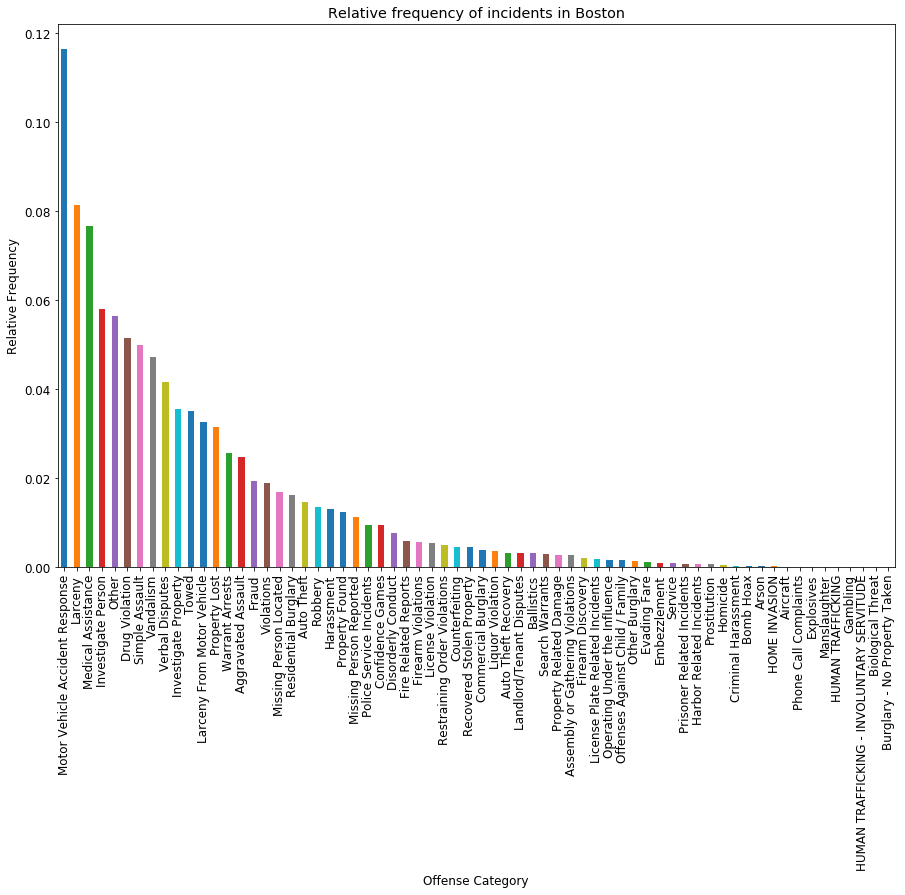

In [18]:
plt.rcParams.update({'font.size': 12})
plot_hist(data=processed_data.OFFENSE_CODE_GROUP.value_counts(ascending=False, normalize=True, 
                                                              sort=True, dropna=True), 
          y_label="Relative Frequency", x_label="Offense Category", 
          title="Relative frequency of incidents in Boston")

It seems that Motor Vehicle Accidents and Larceny are some of the most commonly reported incidents and human trafficking is one of the least reported ones. Note here that just because it is least reported does not mean it doesn't happen. It just means that nobody notices it happening or reports if noticed. Now let us repeat this for districts to identify which districts are the least safe and which are the most.

### Q2. How do different districts in Boston compare on the basis of overall crime incident reports?

For this, we will plot the relative frequency of each value in the `DISTRICT_NAME` column (y-axis) against the name of the district (x-axis). Higher the relative frequency, more unsafe the district.

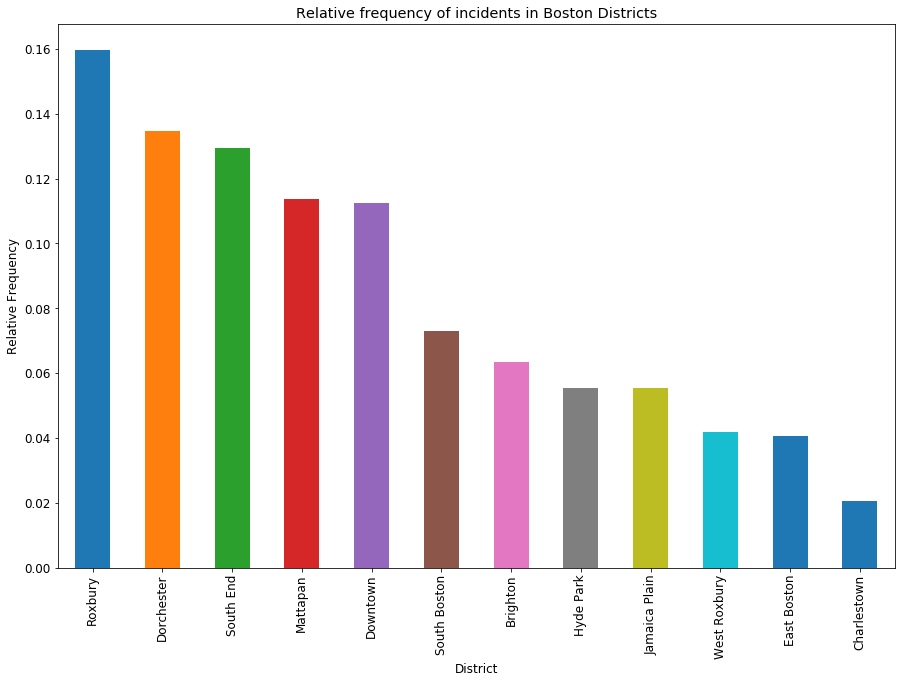

In [19]:
plot_hist(processed_data.DISTRICT_NAME.value_counts(ascending=False, normalize=True, sort=True), 
          y_label="Relative Frequency", x_label="District", 
          title="Relative frequency of incidents in Boston Districts")

From the above graph, we see that Roxbury, Dorchester, and South End are some of the most unsafe districts in Boston and East Boston and Charlestown are the relatively safe ones. This is interesting because both of these groups share physical proximity and properties. Roxbury, Dorchester, and South End are located in the South-East part of Boston, whereas, East Boston and Charlestown are seperated from the mainland by a water body.

### Q3. What are the top 10 crimes in each of the districts?

For this question, we will construct 12 histograph plots, one for each district. In each of the graphs, we plot the relative frequency of the 10 most commonly reported incidents in that district.

In [20]:
def get_top_k_crimes_district(data, district, k=10):
    subset_data = data[data.DISTRICT_NAME == district]
    subset_data = subset_data.OFFENSE_CODE_GROUP.value_counts(normalize=True, 
                                                              dropna=True).sort_values(ascending=False)[:k]
    return subset_data

In [21]:
# Get unique district names
district_names = processed_data.DISTRICT_NAME.dropna().sort_values().unique()
n_cols = 2
n_rows = (len(district_names) // 2) + (len(district_names) % 2)

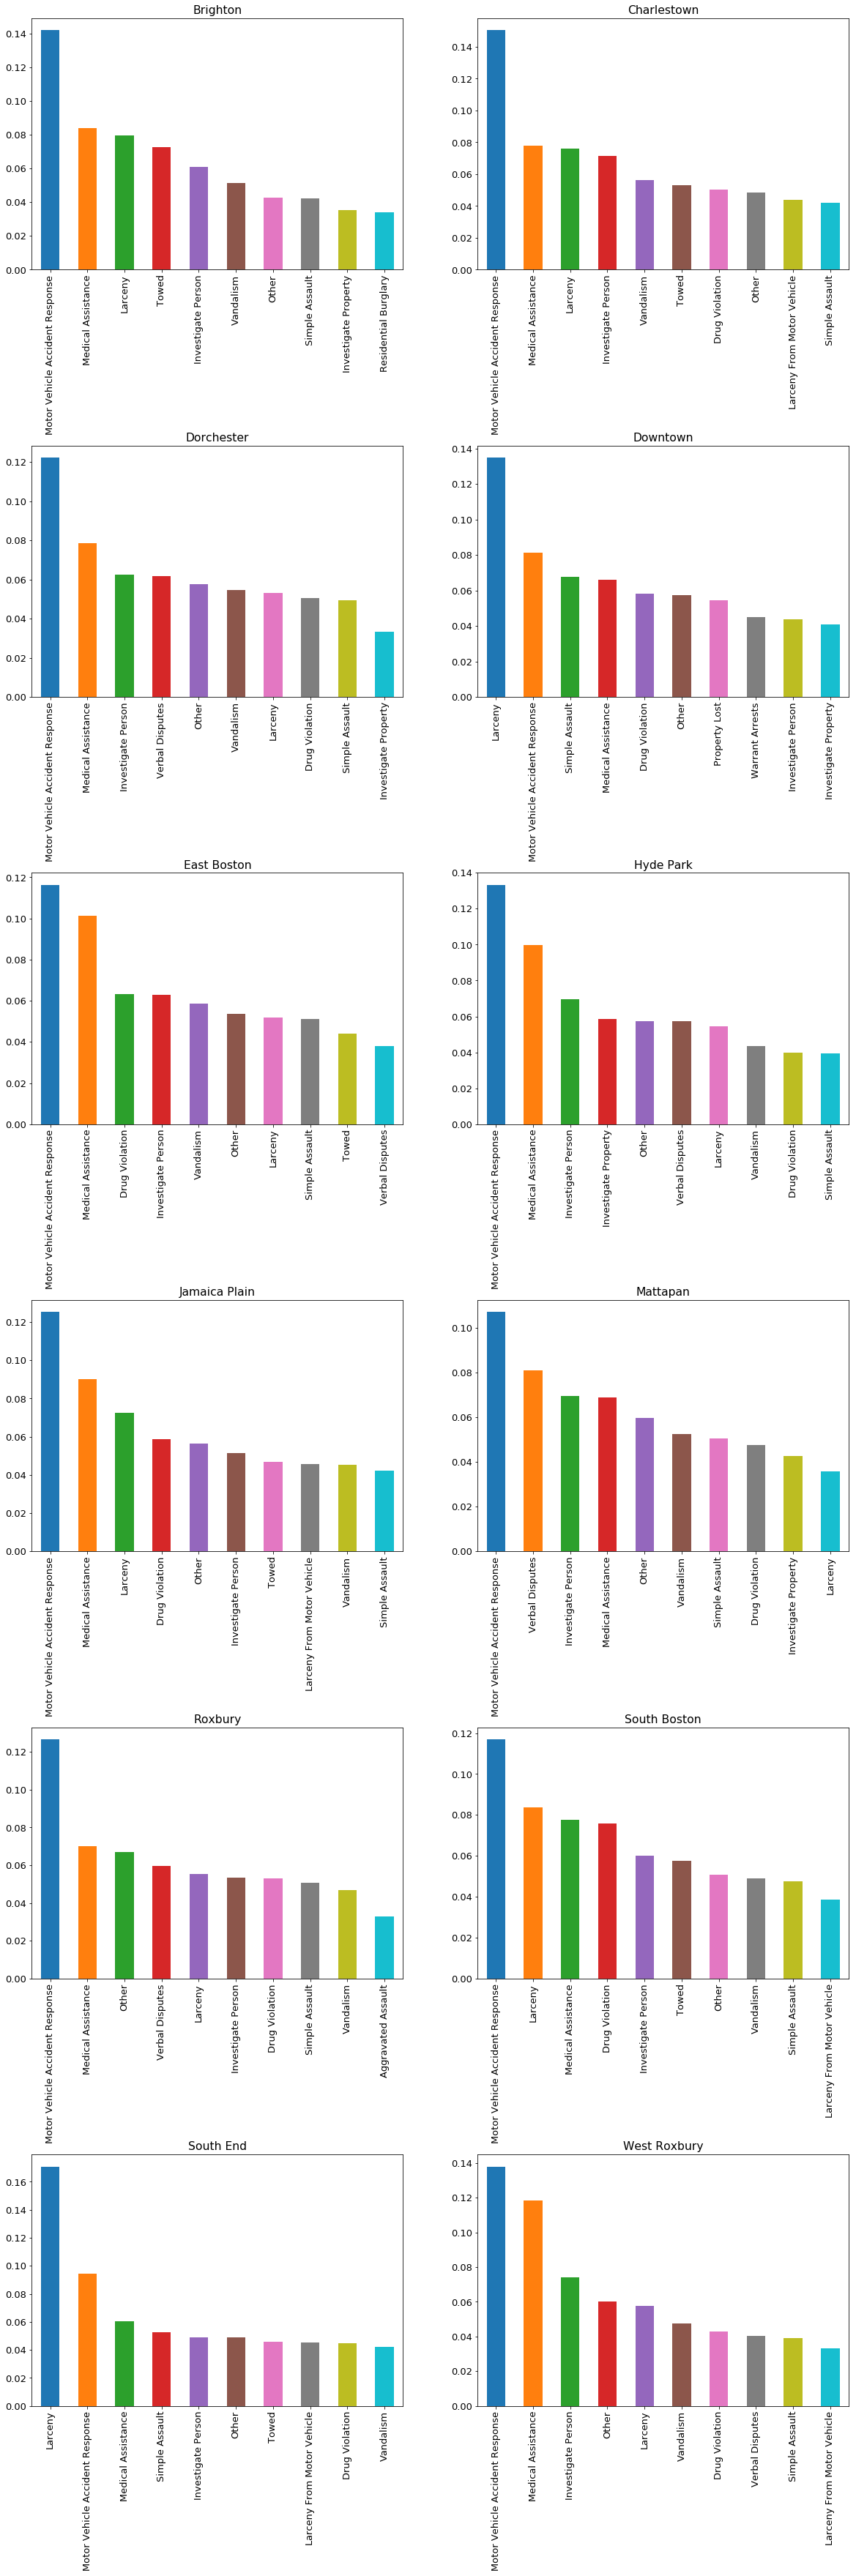

In [22]:
plt.rcParams['figure.figsize'] = [20, 60]
plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(n_rows, n_cols)
x = 0
y = 0
for name in district_names:
    val = get_top_k_crimes_district(processed_data, name)
    _ = val.plot.bar(ax=axs[x, y])
    _ = axs[x, y].set_xticklabels(list(val.index), rotation=90)
    _ = axs[x, y].set_title(name)
    plt.subplots_adjust(hspace = .7)
    y = (y + 1) % 2
    if not y:
        x += 1

The first important observation here is that 'Motor Vehicle Accident Response' and 'Medical Assistance' are very common across all districts. But if we overlook them, we see that in areas such as Roxbury and South End which suffer from more crime incidents, Larceny seems to be more prevelant.

### Q4. What are the top 10 crimes at different times of the day?

In order to simplify the analysis across times, we bucket the 24 hours that we have in a day into 6 bins ("0-3", "4-7", "8-11", "12-15", "16-19", "20-23"). We then follow the same analysis procedure as the previous question and create a graph for each bin.

In [23]:
bin_labels = ["0-3", "4-7", "8-11", "12-15", "16-19", "20-23"]
bins = {i : bin_labels[i // 4] for i in range(24)}
temp_data = processed_data.copy()
temp_data['hbins'] = temp_data.HOUR.replace(bins)

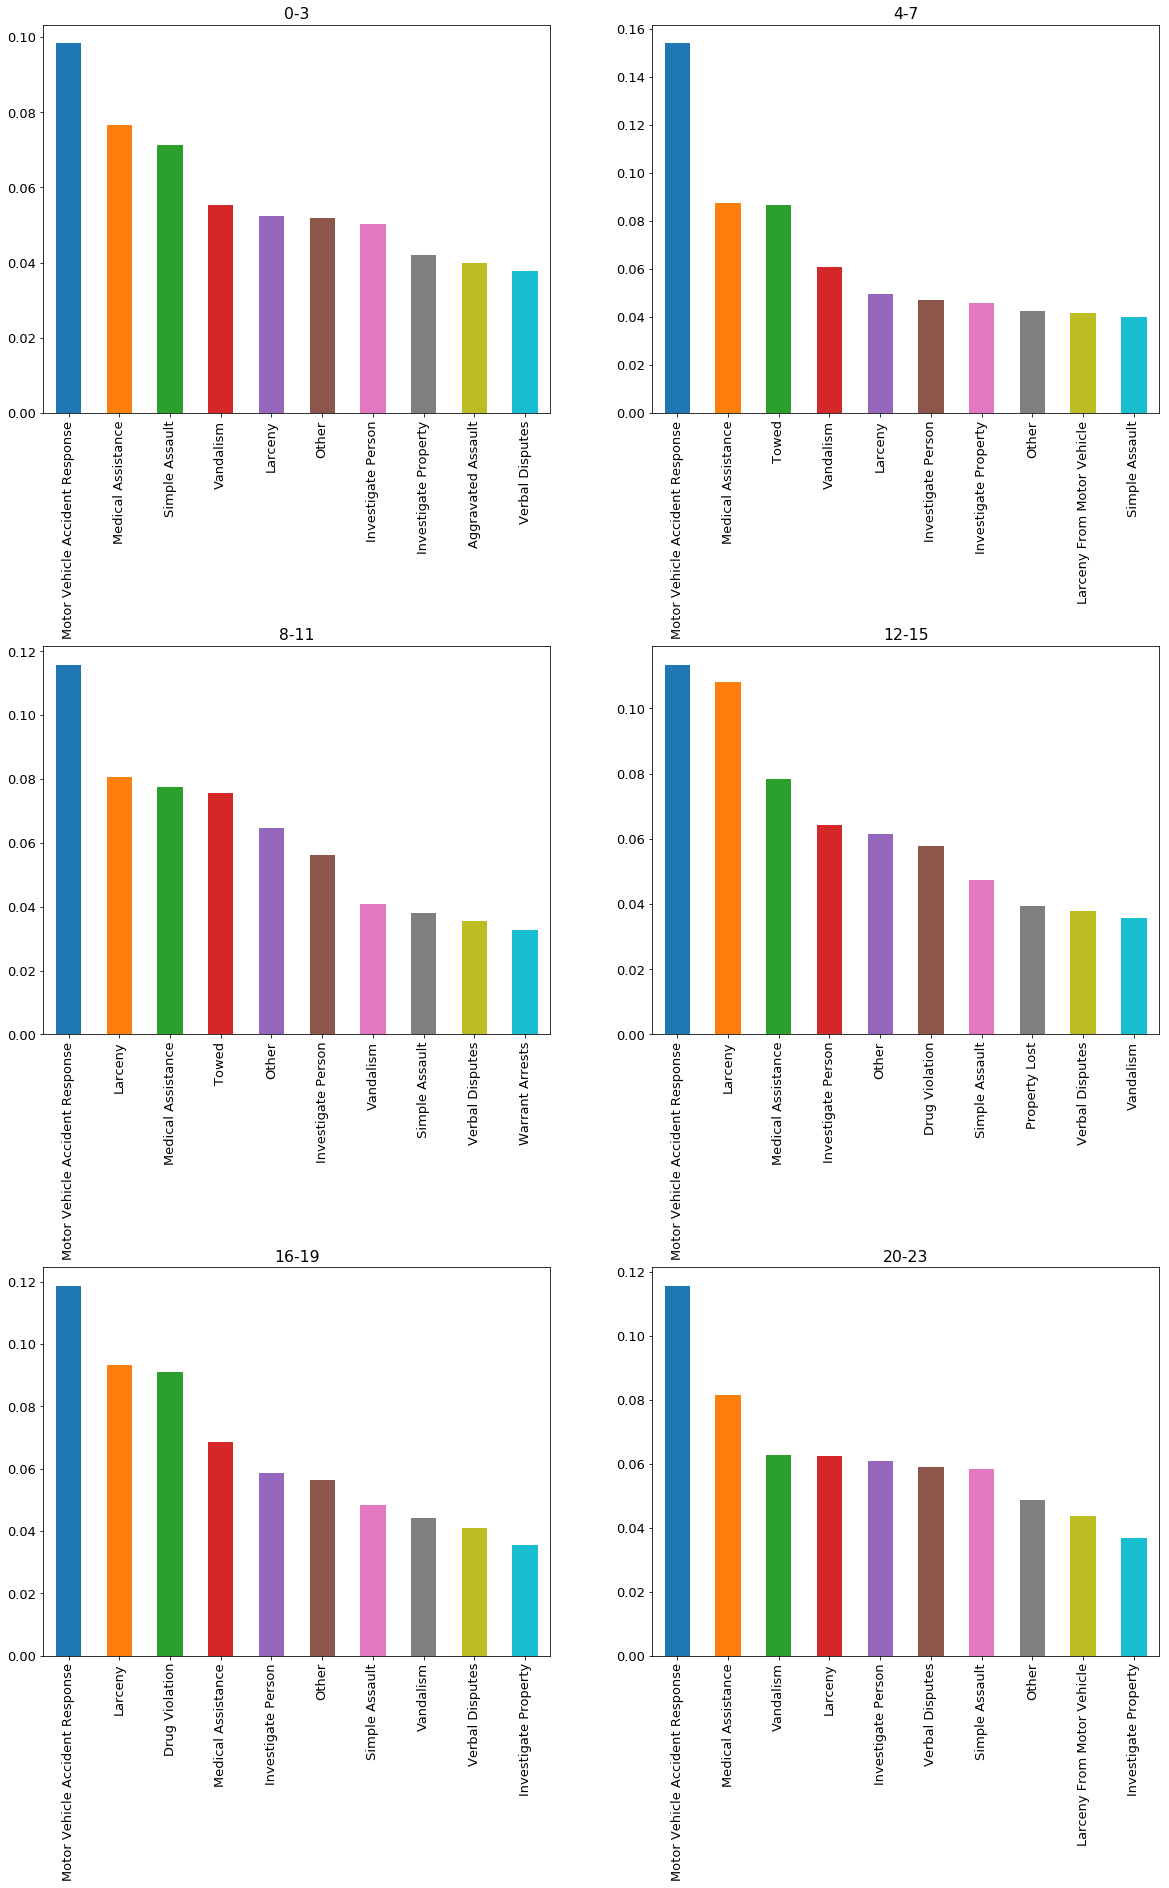

In [24]:
def get_top_k_crimes_hour(data, hbin, k=10):
    subset_data = data[data.hbins == hbin]
    subset_data = subset_data.OFFENSE_CODE_GROUP.value_counts(normalize=True, 
                                                              dropna=True).sort_values(ascending=False)[:k]
    return subset_data

n_cols = 2
n_rows = (len(bin_labels) // 2) + (len(bin_labels) % 2)

plt.rcParams['figure.figsize'] = [20, 30]
plt.rcParams.update({'font.size': 13})
fig, axs = plt.subplots(n_rows, n_cols)
x = 0
y = 0
for hbin in bin_labels:
    val = get_top_k_crimes_hour(temp_data, hbin)
    _ = val.plot.bar(ax=axs[x, y])
    _ = axs[x, y].set_xticklabels(list(val.index), rotation=90)
    _ = axs[x, y].set_title(hbin)
    plt.subplots_adjust(hspace = .6)
    y = (y + 1) % 2
    if not y:
        x += 1

A very interesting general pattern emerges from the data:
As night gets darker, Vandalism and Simple Assualt become very common while Larceny reduces. And during the day, an opposite pattern is observed where Vandalism and Simple Assualt reduce while Larceny becomes popular.

### Q5. During what times of the day are shooting incidents most prevelant?

Here, we just create a table with an entry for each time bin that we created in the previous question. Against each bin, we count the number of incidents which accompanied shooting.

In [25]:
temp_data[temp_data.SHOOTING].hbins.value_counts()

20-23    461
0-3      363
16-19    325
12-15    192
8-11      75
4-7       61
Name: hbins, dtype: int64

Here, we see that shooting incidents are common in the evening and night.

### Q6. What reported incidents are most commonly associated with a shooting?

For this analysis, we will first create a subset of the data where the `SHOOTING` is set to True, and then in this dataset, we plot the relative frequency of each value in the `OFFENSE_CODE_GROUP` column (y-axis) against the name of the offense (x-axis). We will only consider the top 10 crimes here.

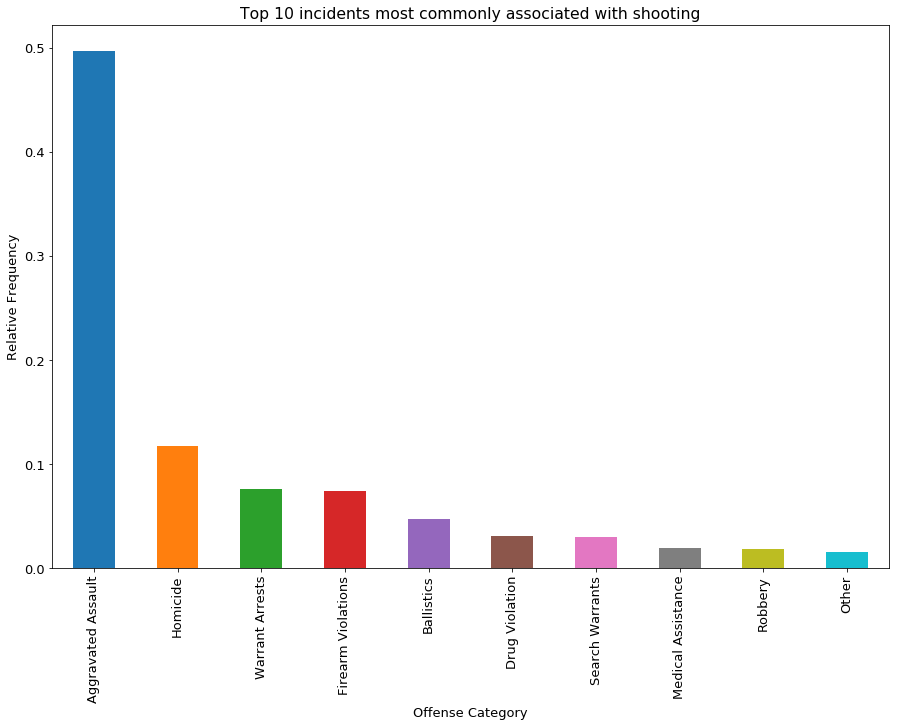

In [26]:
shooting_data_code = processed_data[processed_data.SHOOTING].OFFENSE_CODE_GROUP.value_counts(ascending=False, 
                                                                                             normalize=True, 
                                                                                             sort=True, 
                                                                                             dropna=True)
plot_hist(data=shooting_data_code, y_label="Relative Frequency", x_label="Offense Category", 
          title="Top 10 incidents most commonly associated with shooting", top=10)

Here, we see that Aggravated Assault and Homicides are some crimes that are usually associated with a shooting. Probably the reason why it is called 'Aggravated Assault'. Another interesting way to study this would be to plot the propotion of each crime that is associated with shooting.

Another shocking and sad pattern we see here is that the 'Medical Assistance' is weakly associated with Shooting incidents which could potentially mean that there was nothing left to medically assist after the shooting.

### Q7. Which districts suffer more shooting incidents than the others?

We repeat the same steps as the above question to identify districts most commonly associated with a shooting incident.

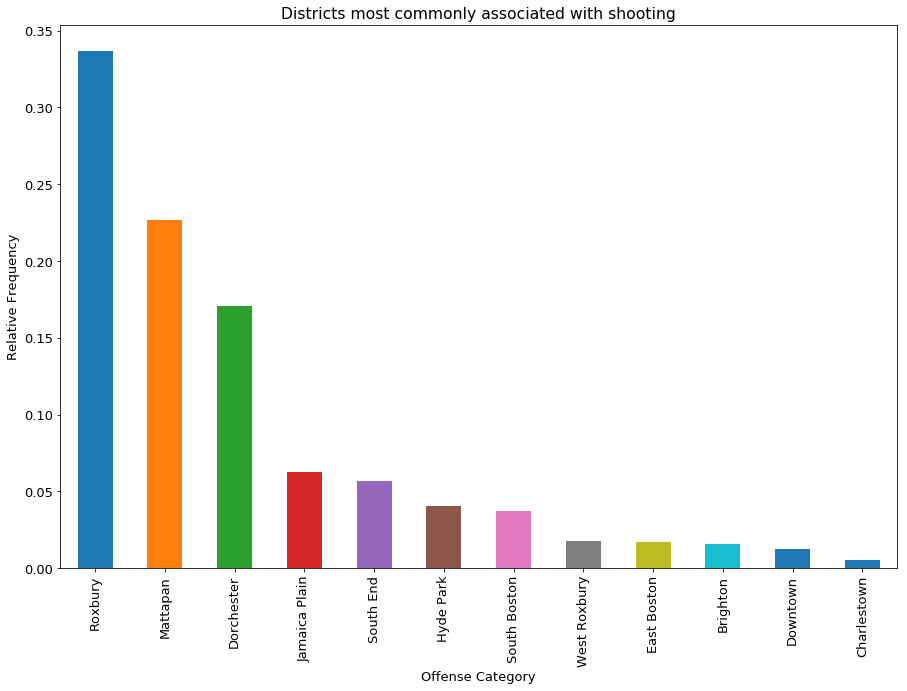

In [27]:
shooting_data_district = processed_data[processed_data.SHOOTING].DISTRICT_NAME.value_counts(ascending=False, 
                                                                                            normalize=True, 
                                                                                            sort=True, 
                                                                                            dropna=True)
plot_hist(data=shooting_data_district, y_label="Relative Frequency", x_label="Offense Category", 
          title="Districts most commonly associated with shooting")

Interstingly, Roxbury, Mattapan and Dorchester are again on the top in this list and Charlestown at the bottom. Again, another interesting way to study this would be to plot the propotion of the crime in each district that is associated with shooting.

## Limitations

1. The dataset records the crime incidents where were reported to the Boston Police Department. Just because some crimes seem uncommon doesn't always imply that they are indeed uncommon. It could also mean that the crime is a clean job and leaves no trails to be reported.

2. The dataset used for this analysis captures incident reports between 2015-06-15 & 2019-11-14. For a more recent analysis, one would need to update the `raw_data.csv` file in the repository and re-run the project.

## Conclusions

1. It is very obvious from all the graphs above that Boston needs some serious attention on the motor vehicle accident issues. Maybe stricter driving laws and driving tests might help.
2. Roxbury, Mattapan and Dorchester seem to be very unsafe, and Charlestown, on the other hand, seems to be very safe.
3. Going out at night is particularly unsafe for anyone and should be avoided when possible.

## Future Work

- Merge with information about population and the area each district and normalize values accordingly.
- Analyze the trend of change in certain crimes over the past few years.
- Maybe relate the trend with relevant laws which were passed to observe the effect of those laws.
- As pointed out in the [Findings](#Findings) section, study the proportion of crime in each district and the proportion of different kinds of crimes that are associated with shooting.

## References

[1] The Normality of Crime - [http://www.d.umn.edu/cla/faculty/jhamlin/4111/Durkheim%20-%20Division%20of%20Labor_files/The%20Normality%20of%20Crime.pdf](http://www.d.umn.edu/cla/faculty/jhamlin/4111/Durkheim%20-%20Division%20of%20Labor_files/The%20Normality%20of%20Crime.pdf)

[2] List of mass shootings in the United States in 2018 - [https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States_in_2018](https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States_in_2018)

[3] List of mass shootings in the United States in 2019 - [https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States_in_2019](https://en.wikipedia.org/wiki/List_of_mass_shootings_in_the_United_States_in_2019)

[4] Crime Incident Reports - [https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system](https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system)

[5] Boston-Crime-Analysis - [https://github.com/MehtaShruti/Boston-Crime-Analysis](https://github.com/MehtaShruti/Boston-Crime-Analysis)

[6] Boston Crime Analyis | Kaggle - [https://www.kaggle.com/cnchandroo/boston-crime-analysis](https://www.kaggle.com/cnchandroo/boston-crime-analysis)

[7] Workbook: Boston Crime Data Analysis - [https://public.tableau.com/views/Bostoncrimedataanalysis/Story1](https://public.tableau.com/views/Bostoncrimedataanalysis/Story1)

[8] Open Data Commons Public Domain Dedication and License (PDDL) - [https://opendatacommons.org/licenses/pddl/index.html](https://opendatacommons.org/licenses/pddl/index.html)